# Constraint Satisfaction problem

**A constraint satisfaction problem (CSP) is a problem in which variables are assigned values based on a set of constraints. The goal is to find a solution where all variables are assigned values that satisfy all constraints. CSPs are used in many fields, including artificial intelligence, operations research, and computer science. They are often used to model decision-making problems and can be solved using a variety of techniques, such as backtracking, local search, and constraint programming.**

## Map Coloring
##### An exampole for CSP

variables  =  ` [ A , B, C , D ] `<br>
domain = ` [ Red , Green , Blue ] `<br>


Here we are making an attempt to solve the constraint satisfaction problem on the below map of japan.

In [39]:
import random
from PIL import Image
import matplotlib.pyplot as plt
import networkx as nx

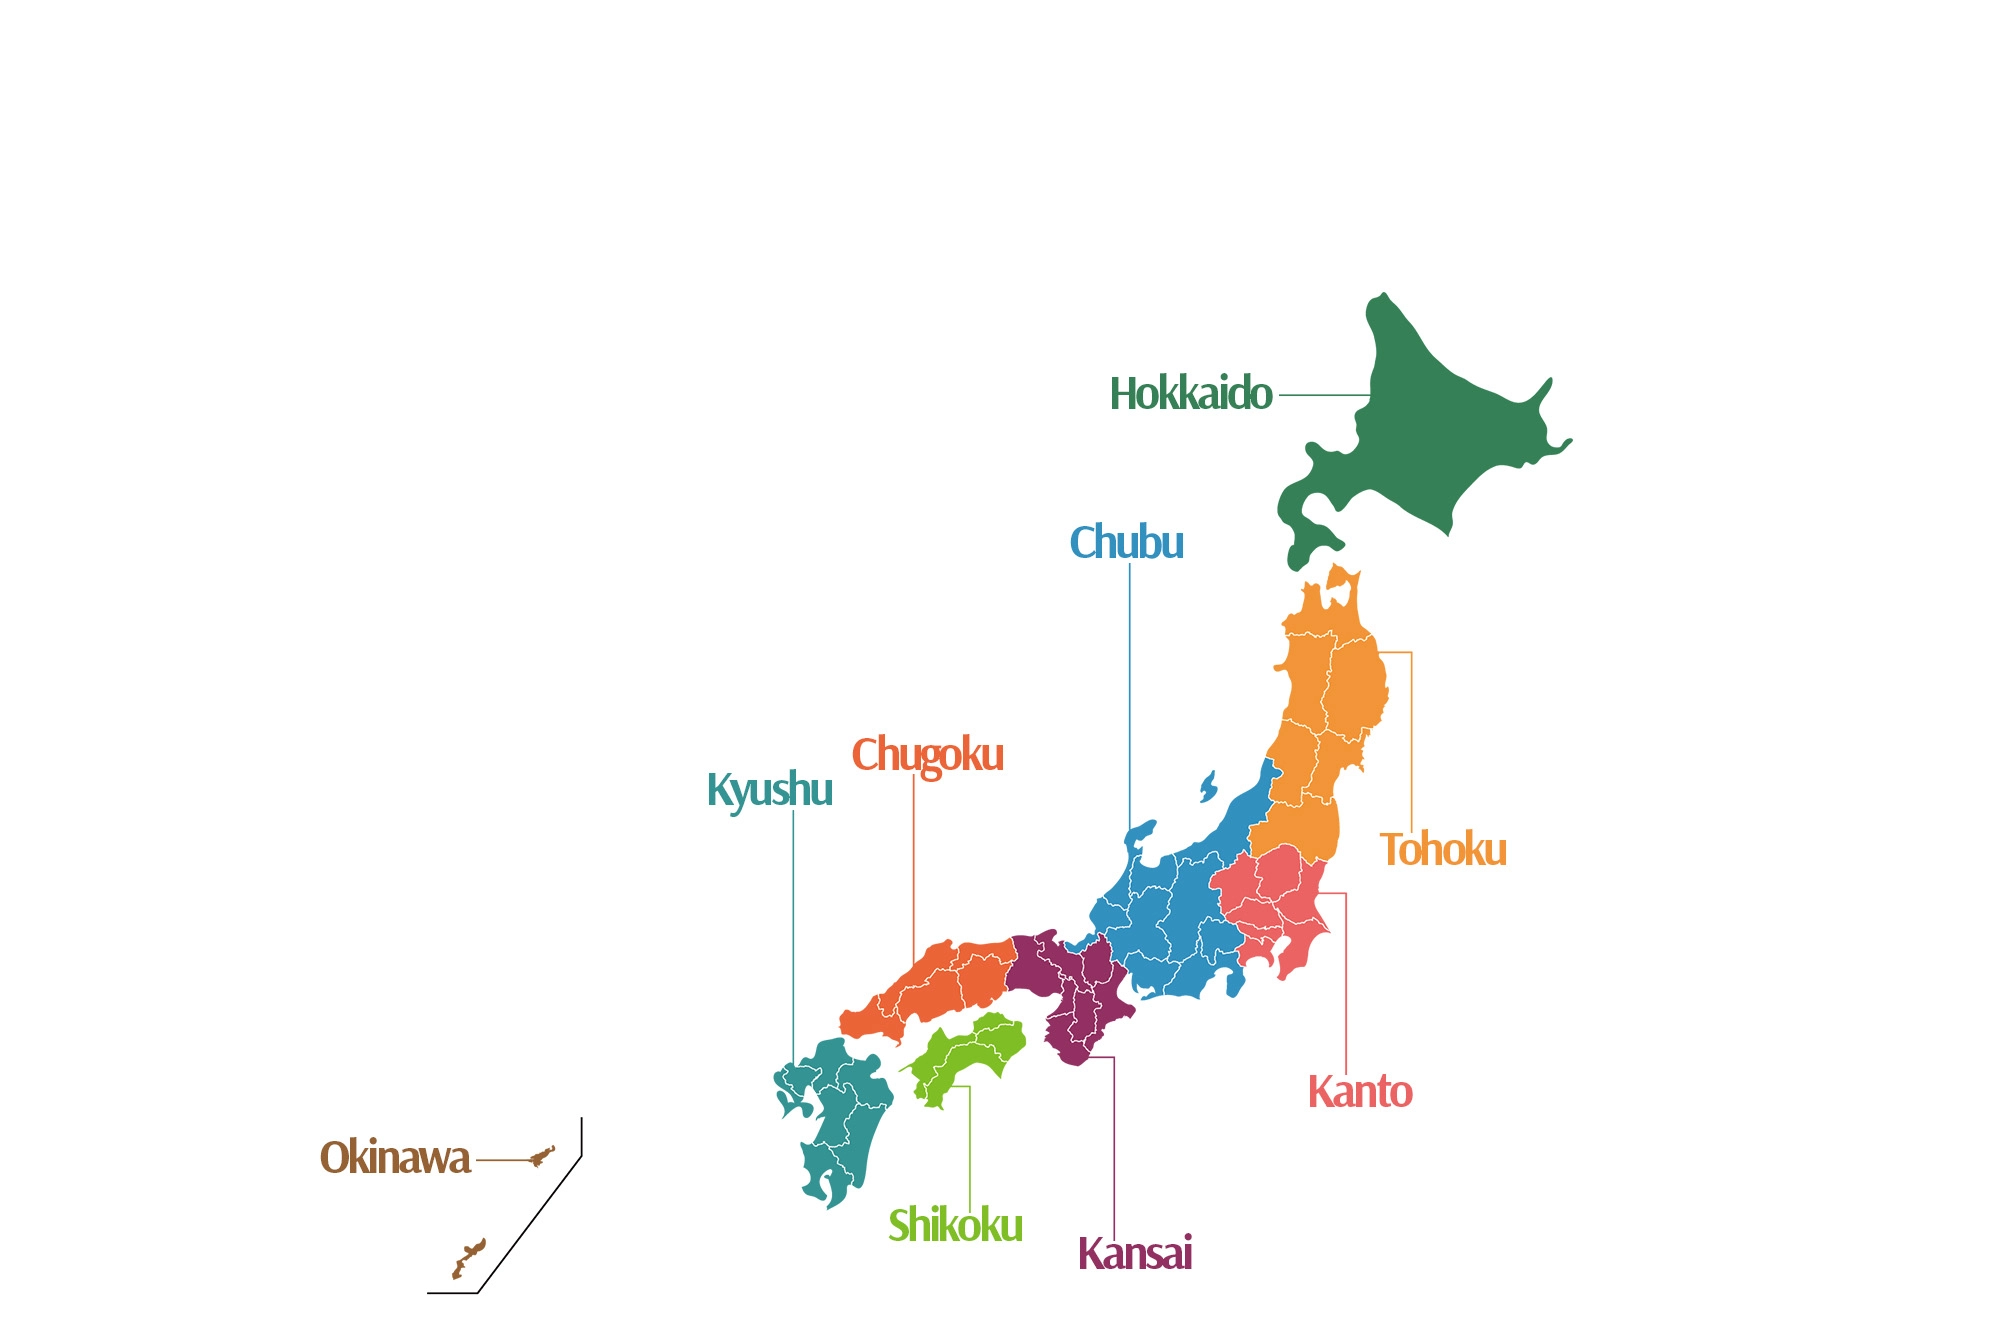

In [40]:
var=Image.open('../images/csp.webp')
var

In [41]:
def color_map(graph, colors):
    # Initialize the color mapping as empty
    color_map = {}
    for node in graph:
        # Get the node's neighbors
        neighbors = graph[node]
        # Define the constraints for the current node
        constraints = []
        for neighbor in neighbors:
            if neighbor in color_map:
                constraints.append(color_map[neighbor])
        # Find the first color that satisfies the constraints
        while True:
            color=random.choice(colors)
            if color not in constraints:
                color_map[node] = color
                break
    return color_map


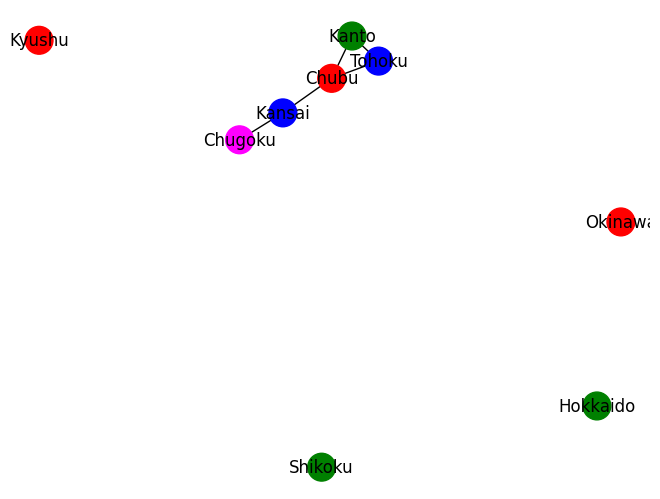

In [51]:
nodes=['Hokkaido','Tohoku','Kanto','Chubu','Chugoku','Shikoku','Kansai','Kyushu','Okinawa']
edges=[
    ('Tohoku','Kanto'),
    ('Tohoku','Chubu'),
    ('Chubu','Kanto'),
    ('Chubu','Kansai'),
    ('Kansai','Chugoku')
]
graph = {
    'Tohoku': ['Kanto', 'Chubu'],
    'Kanto': ['Tohoku', 'Chubu'],
    'Chubu': ['Tohoku', 'Kanto','Kansai'],
    'Kansai': ['Chubu', 'Chugoku'],
    'Chugoku':['Kansai'],
    'Okinawa':[],
    'Hokkaido':[],
    'Shikoku':[],
    'Kyushu':[]
}
colors = ['red', 'green', 'blue','cyan','magenta']

ans=color_map(graph=graph,colors=colors)

G=nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)
nx.draw(G,node_color=[ans[node] for node in G],node_size=400,with_labels=True)
plt.show()